In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Algorithm1

In [ ]:
def orientation(A, B, rem):
    # Returns a measure of the angle with respect to the AB vector
    angle1 = math.atan2((B-A)[1], (B-A)[0])
    angle2 = math.atan2((rem-B)[1], (rem-B)[0])

    if angle2-angle1<0:
        return 2*math.pi + angle2-angle1
    return angle2-angle1

def convexHullAlgo(points):
    """
    Given a set a points in 2D, finds the boundary points of the convex hull

    Parameters
    ----------
    points : ndarray of shape (n,2)
        The set of points in 2D

    Returns
    -------
    boundary_points : ndarray of shape (m,2)
        The set of points that make up the convex hull
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting.
    """
    lowest_y = points[0, 1]
    lowest_point = 0
    for i in range(1, points.shape[0]):
        if lowest_y > points[i, 1]:
            lowest_y = points[i, 1]
            lowest_point = i

    curr = points[lowest_point, :]
    prev = curr - np.array([1, 0])

    remaining = np.delete(points, lowest_point, 0)
    boundary_points = points[lowest_point, :]
    boundary_points = np.reshape(boundary_points, (1, 2))

    while remaining.shape[0] != 0:
        lowest_angle = 100
        for i in range(remaining.shape[0]):
            diff_angle = orientation(prev, curr, remaining[i, :])
            if lowest_angle > diff_angle:
                next_point = i
                lowest_angle = diff_angle

        if any(curr != points[lowest_point, :]) and lowest_angle > orientation(prev, curr, points[lowest_point, :]):
            break

        boundary_points = np.vstack((boundary_points, np.reshape(remaining[next_point, :], (1, 2))))
        prev = curr
        curr = remaining[next_point, :]
        remaining = np.delete(remaining, next_point, 0)


    return boundary_points

### Half Space based Algorithm or Any other Efficient Algorithm

In [ ]:
def convexHullEfficient(points):
    """
    Given a set a points in 2D, finds the boundary points of the convex hull

    Parameters
    ----------
    points : ndarray of shape (n,2)
        The set of points in 2D

    Returns
    -------
    boundary_points : ndarray of shape (m,2)
        The set of points that make up the convex hull
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting.
    """

    # Using Andrew's monotone chain convex hull algorithm
    '''Pseudocode:
    Input: a list P of points in the plane.

    Precondition: There must be at least 3 points.

    Sort the points of P by x-coordinate (in case of a tie, sort by y-coordinate).

    Initialize U and L as empty lists.
    The lists will hold the vertices of upper and lower hulls respectively.

    for i = 1, 2, ..., n:
        while L contains at least two points and the sequence of last two points
                of L and the point P[i] does not make a counter-clockwise turn:
            remove the last point from L
        append P[i] to L

    for i = n, n-1, ..., 1:
        while U contains at least two points and the sequence of last two points
                of U and the point P[i] does not make a counter-clockwise turn:
            remove the last point from U
        append P[i] to U

    Remove the last point of each list (it's the same as the first point of the other list).
    Concatenate L and U to obtain the convex hull of P.
    Points in the result will be listed in counter-clockwise order
    '''
    # Reference for above pseudocode: https://en.wikibooks.org/wiki/Algorithm_Implementation/Geometry/Convex_hull/Monotone_chain

    points = points[np.argsort(points[:, 0])]

    lower_boundary = points[0, :]
    lower_boundary = np.reshape(lower_boundary, (1, 2))

    for i in range(points.shape[0]):
        j=0
        while(lower_boundary.shape[0] >= 2 and np.sin(orientation(lower_boundary[-2, :], lower_boundary[-1, :], points[i, :])) <= 0):
            lower_boundary = np.delete(lower_boundary, lower_boundary.shape[0]-1, 0)
        lower_boundary = np.vstack((lower_boundary, points[i, :]))

    upper_boundary = points[-1, :]
    upper_boundary = np.reshape(upper_boundary, (1, 2))

    rev_ind = np.arange(points.shape[0]-2, -1, -1)
    for i in rev_ind:
        while(upper_boundary.shape[0] >= 2 and np.sin(orientation(upper_boundary[-2, :], upper_boundary[-1, :], points[i, :])) <= 0):
            upper_boundary = np.delete(upper_boundary, upper_boundary.shape[0]-1, 0)
        upper_boundary = np.vstack((upper_boundary, points[i, :]))

    boundary_points = np.vstack((lower_boundary, upper_boundary))

    return boundary_points

### Plotting and Visualization

In [ ]:
def plotConvexHull(points, boundary_points, cache=None):
    """
    Plots the convex hull of a set of points in 2D

    Parameters
    ----------
    points : ndarray of shape (n,2)
        The set of points in 2D
    boundary_points : ndarray of shape (m,2)
        The set of points that make up the convex hull
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting.

    Returns
    -------
    None
    """
    plt.scatter(points[:, 0], points[:, 1], label = 'Points in the Space')
    plt.fill(boundary_points[:, 0], boundary_points[:, 1], 'cyan', alpha=0.2, label = 'Convex Space')
    boundary_points = np.vstack((boundary_points, np.reshape(boundary_points[0, :], (1, 2))))
    plt.plot(boundary_points[:, 0], boundary_points[:, 1], 'red', alpha=0.7)
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Convex Hull of the given Points')
    plt.legend(loc = 'upper right', bbox_to_anchor=(1.4, 1))
    plt.show()

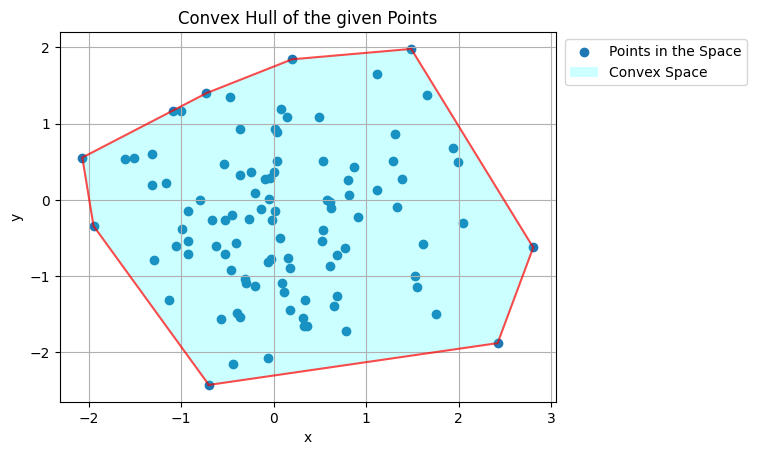

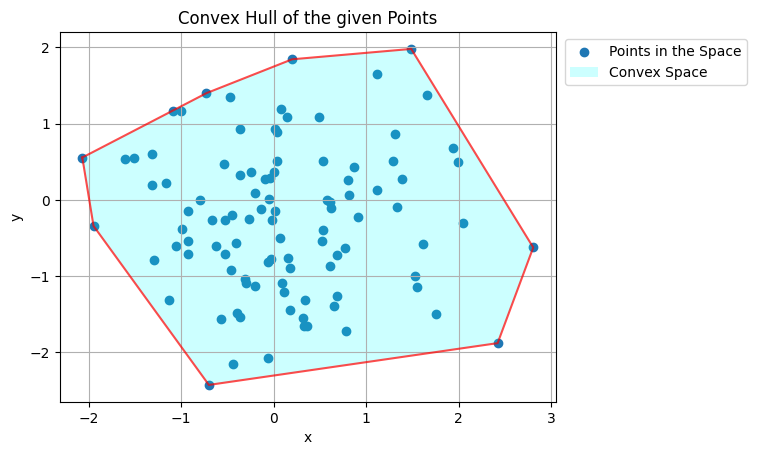

In [ ]:
points = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100)

boundary_points = convexHullAlgo(points)
plotConvexHull(points, boundary_points)

boundary_points = convexHullEfficient(points)
plotConvexHull(points, boundary_points)